In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-articles-dataset/bbc_news_text_complexity_summarization.csv
/kaggle/input/bbc-articles-dataset/archive (2)/bbc-news-data.csv
/kaggle/input/bbc-articles-dataset/archive/bbc_text_cls.csv


# 📝 Text Classification with Multiple Machine Learning Models

Welcome to this **comprehensive text classification notebook**! 🎯  
In this notebook, we will preprocess text data, convert it into numeric features, and train multiple machine learning models to classify text into categories.  

📌 **Example Dataset Context:** We can use datasets like **BBC News articles** 📰 to classify news into topics such as Business, Politics, Sports, Technology, etc.

---

## 🔹 Key Learning Outcomes

1. **Data Preprocessing** ✨  
   - Clean text: lowercase, remove punctuation, and numbers  
   - Tokenization, stopword removal, and stemming/lemmatization  

2. **Label Encoding** 🏷️  
   - Convert categorical text labels into numeric format for machine learning models  

3. **Feature Extraction** 💡  
   - Transform text into numerical features using **TF-IDF**  
   - Understand why TF-IDF highlights important words for classification  

4. **Train Multiple Models** 🤖  
   - **Support Vector Machine (SVM)**  
   - **Multinomial Naive Bayes**  
   - **Gaussian Naive Bayes**  
   - **Decision Tree**  
   - **Random Forest**  

5. **Model Evaluation & Visualization** 📊  
   - Compute Accuracy, Precision, Recall, F1-Score  
   - Generate confusion matrix heatmaps for each model  
   - Compare models and identify the best-performing classifier  

---

## 🔹 Why This Notebook is Useful

- Learn how to build a **complete ML pipeline** for text classification  
- Follow the workflow: **preprocessing → feature extraction → model training → evaluation**  
- Quickly identify **which model performs best** on your dataset  
- Visualize model performance clearly with **heatmaps and metrics**  
- Apply the workflow to **real-world datasets**, such as news articles from **BBC News** 📰

---

⚡ **Tip:** You can easily extend this notebook with **new models, alternative preprocessing steps, or custom datasets** for your own text classification projects!


# Import Libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# updated import

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# Load Data

In [85]:
data=pd.read_csv("/kaggle/input/bbc-articles-dataset/bbc_news_text_complexity_summarization.csv")
data.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


# Encode Labels
**Description:**  
Converts categorical labels to numeric values for machine learning.  
Each unique label gets a unique integer.


In [86]:
from sklearn.preprocessing import LabelEncoder

# Clean the labels: strip spaces and lowercase
data['labels'] = data['labels'].str.strip().str.lower()

# Encode labels to numbers
le = LabelEncoder()
data['labels_num'] = le.fit_transform(data['labels'])

# Check the results
print(data[['labels', 'labels_num']].head())
print("Unique numeric labels:", data['labels_num'].unique())
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))



     labels  labels_num
0  business           0
1  business           0
2  business           0
3  business           0
4  business           0
Unique numeric labels: [0 1 2 3 4]
Mapping: {'business': np.int64(0), 'entertainment': np.int64(1), 'politics': np.int64(2), 'sport': np.int64(3), 'tech': np.int64(4)}


In [87]:
label_counts = data['labels'].value_counts()
print(label_counts)

labels
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64


# Data Visualization

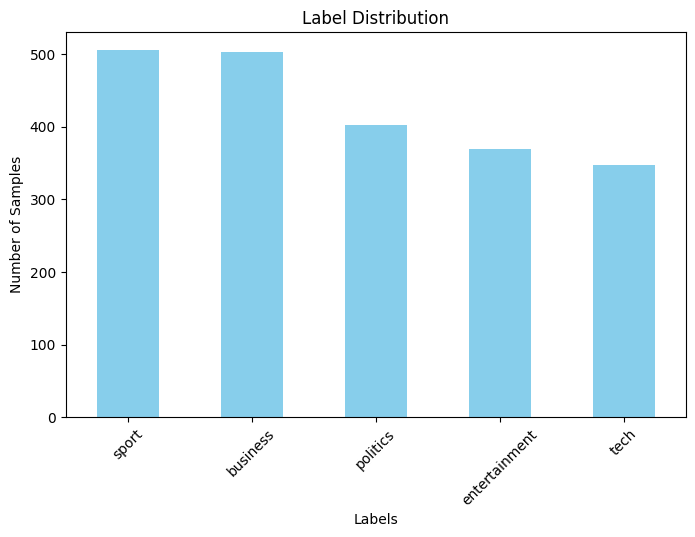

In [88]:


# Count labels
label_counts = data['labels'].value_counts()

# Plot
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color='skyblue')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


# Data Preprocessing
**Description:**  
This cell cleans the text:  
- Converts to lowercase  
- Removes punctuation and numbers  
- Removes stopwords  
- Applies either stemming or lemmatization  
The cleaned text is saved in `clean_text`.


In [89]:
import re
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text, method='lemmatize'):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    # Apply stemming or lemmatization
    if method == 'stem':
        words = [stemmer.stem(w) for w in words]
    elif method == 'lemmatize':
        words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

# Example usage
data['clean_text'] = data['text'].apply(lambda x: preprocess_text(x, method='lemmatize'))



In [90]:

print(data[['text', 'clean_text']].head())

                                                text  \
0  Ad sales boost Time Warner profit\n\nQuarterly...   
1  Dollar gains on Greenspan speech\n\nThe dollar...   
2  Yukos unit buyer faces loan claim\n\nThe owner...   
3  High fuel prices hit BA's profits\n\nBritish A...   
4  Pernod takeover talk lifts Domecq\n\nShares in...   

                                          clean_text  
0  ad sale boost time warner profit quarterly pro...  
1  dollar gain greenspan speech dollar hit highes...  
2  yukos unit buyer face loan claim owner embattl...  
3  high fuel price hit ba profit british airway b...  
4  pernod takeover talk lift domecq share uk drin...  


# Split Data

**Description:**  
Splits the dataset into training (80%) and testing (20%) sets, keeping class proportions using `stratify=y`.


In [91]:
X = data['clean_text']
y = data['labels_num']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the split sizes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1701
Testing samples: 426


# TF-IDF Vectorization
**Description:**  
Converts text into numerical features using TF-IDF, which emphasizes important words and reduces the effect of common words.


In [92]:
# 1. Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # you can adjust max_features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# Train Multiple Models and Evaluate Performance

This section trains several machine learning classifiers on the TF-IDF features and evaluates their performance.  
We use the following models:
- **SVM (Support Vector Machine)**
- **Multinomial Naive Bayes**
- **Gaussian Naive Bayes**
- **Decision Tree**
- **Random Forest**

For each model, we compute:
- Accuracy
- Classification report (precision, recall, F1-score)
- Confusion matrix heatmap


In [93]:
models = {
    "SVM": svm.SVC(kernel='linear', probability=True, random_state=42),
    "MultinomialNB": MultinomialNB(),
    "GaussianNB": GaussianNB(),  # Note: works only with dense arrays
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

--- SVM ---
Accuracy: 0.9788732394366197
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       101
           1       0.95      0.99      0.97        74
           2       0.98      0.99      0.98        81
           3       1.00      0.99      1.00       101
           4       0.96      0.96      0.96        69

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



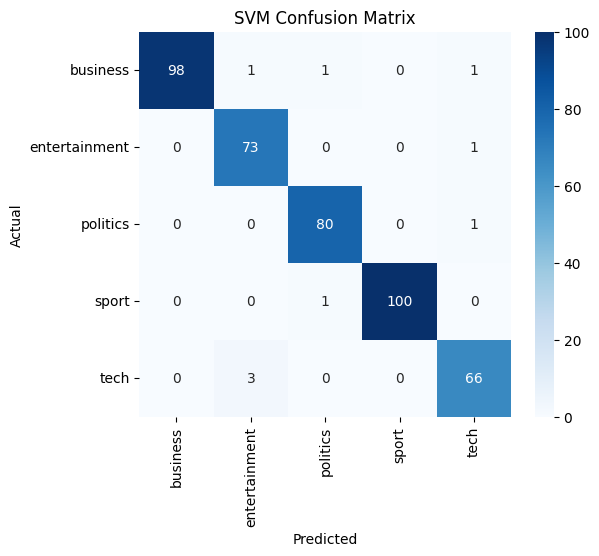

--- MultinomialNB ---
Accuracy: 0.9765258215962441
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       101
           1       0.99      0.97      0.98        74
           2       0.95      0.99      0.97        81
           3       1.00      1.00      1.00       101
           4       0.94      0.97      0.96        69

    accuracy                           0.98       426
   macro avg       0.97      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



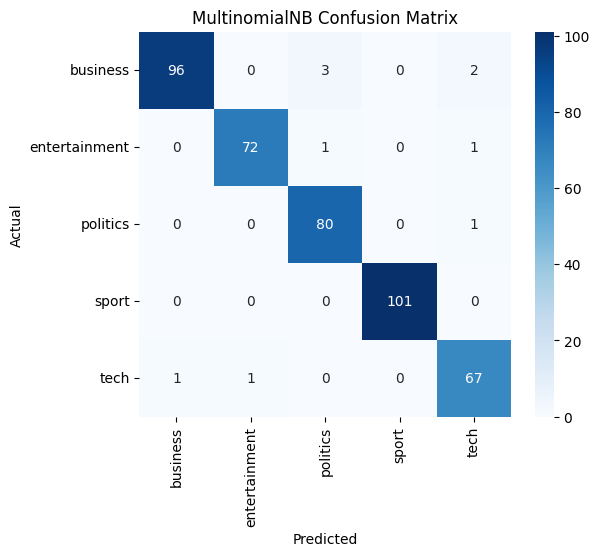

--- GaussianNB ---
Accuracy: 0.8967136150234741
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       101
           1       0.92      0.88      0.90        74
           2       0.85      0.93      0.89        81
           3       1.00      0.92      0.96       101
           4       0.79      0.94      0.86        69

    accuracy                           0.90       426
   macro avg       0.89      0.90      0.89       426
weighted avg       0.90      0.90      0.90       426



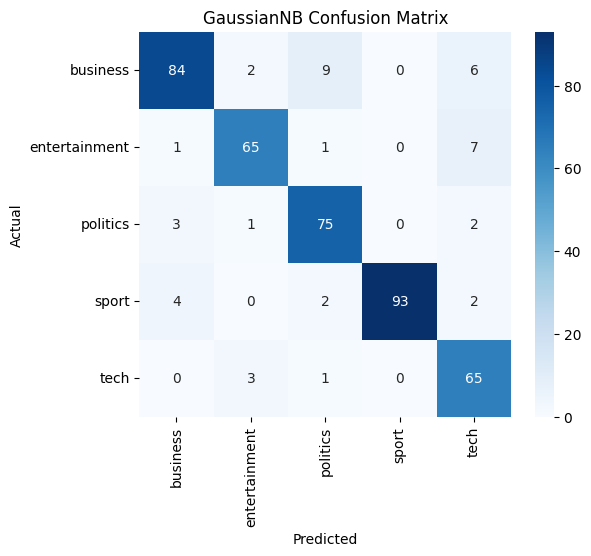

--- DecisionTree ---
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       101
           1       0.79      0.77      0.78        74
           2       0.84      0.86      0.85        81
           3       0.94      0.88      0.91       101
           4       0.82      0.81      0.82        69

    accuracy                           0.83       426
   macro avg       0.83      0.83      0.83       426
weighted avg       0.84      0.83      0.83       426



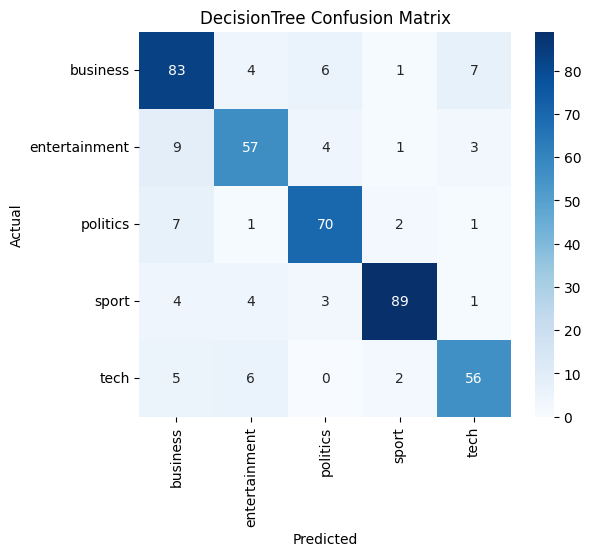

--- RandomForest ---
Accuracy: 0.9765258215962441
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       101
           1       1.00      0.99      0.99        74
           2       0.96      0.96      0.96        81
           3       1.00      1.00      1.00       101
           4       0.93      0.99      0.96        69

    accuracy                           0.98       426
   macro avg       0.97      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



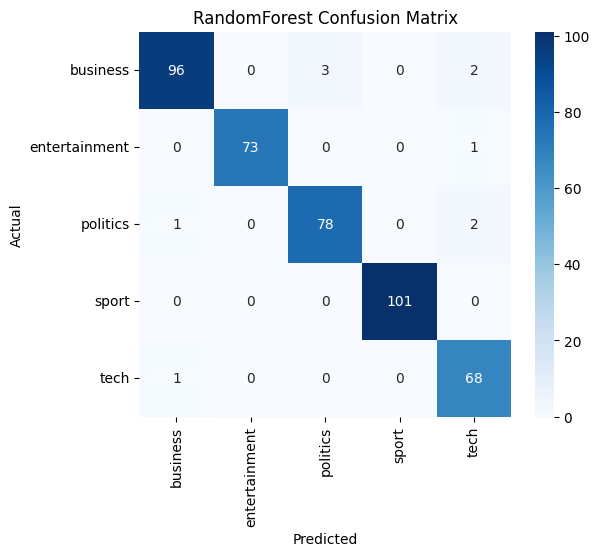

In [98]:
for name, model in models.items():
    print(f"--- {name} ---")
    # For GaussianNB, convert sparse matrix to dense
    if name == "GaussianNB":
        model.fit(X_train_tfidf.toarray(), y_train)
        y_pred = model.predict(X_test_tfidf.toarray())
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare Multiple Models and Identify the Best One

This section evaluates all trained models on the test set, calculates accuracy and F1-score, and identifies the best-performing model.


In [99]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

# Dictionary to store results
results = []

for name, model in models.items():
    # For GaussianNB, convert sparse to dense
    if name == "GaussianNB":
        model.fit(X_train_tfidf.toarray(), y_train)
        y_pred = model.predict(X_test_tfidf.toarray())
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # weighted F1-score
    results.append({'Model': name, 'Accuracy': acc, 'F1-Score': f1})

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1-Score', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Show results
print(results_df)

# Best model
best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} with Accuracy={best_model['Accuracy']:.4f} and F1-Score={best_model['F1-Score']:.4f}")


           Model  Accuracy  F1-Score
0            SVM  0.978873  0.978953
1   RandomForest  0.976526  0.976592
2  MultinomialNB  0.976526  0.976567
3     GaussianNB  0.896714  0.897640
4   DecisionTree  0.833333  0.833992

Best Model: SVM with Accuracy=0.9789 and F1-Score=0.9790
